In [50]:
from itertools import count
import pandas as pd
import numpy as np
from collections import Counter

xrxc = pd.read_excel('./input/xiaoerxiaochuan/data.xlsx')
xrxc.rename(columns={'Unnamed: 11': '症状'}, inplace=True)

xrxc = xrxc.loc[:, ['症状', '咳嗽分型']]
xrxc = xrxc.loc[(xrxc['咳嗽分型'] == '寒性哮喘') | (xrxc['咳嗽分型'] == '热性哮喘')]
xrxc.reset_index(drop=True, inplace=True)
xrxc['症状'] = xrxc['症状'].str.replace('舌苔薄舌苔白', '舌苔薄白')
xrxc['症状'] = xrxc['症状'].str.replace('大便干', '大便偏干')
xrxc['症状'] = xrxc['症状'].str.replace('喘息', '喘')
xrxc['症状'] = xrxc['症状'].str.replace('呼吸音粗糙', '呼吸音粗')
xrxc['症状'] = xrxc['症状'].str.replace('喘鸣音', '喘鸣')
xrxc['症状'] = xrxc['症状'].str.replace('薄舌苔白', '舌苔薄白')
xrxc['症状'] = xrxc['症状'].str.replace('大便偏稀', '大便稀')
xrxc['症状'] = xrxc['症状'].str.replace('纳差', '纳欠佳')
xrxc['症状'] = xrxc['症状'].str.replace('纳少', '纳欠佳')

xrxc.to_csv('./output/xiaoerxiaochuan/小儿哮喘_原始数据.csv', index=False)

counter = Counter([])
for i in xrxc['症状']:
    counter += Counter(i.split('、'))
data = pd.DataFrame(columns=counter.keys())
print(counter)
for i, j in xrxc['症状'].items():
    for k in counter.keys():
        data.loc[i, k] = 0
        for m in j.split('、'):
            if k == m:
                data.loc[i, k] = 1
                break
data = pd.concat([data, xrxc['咳嗽分型']], axis=1)
data['咳嗽分型'] = data['咳嗽分型'].replace('热性哮喘', 0)
data['咳嗽分型'] = data['咳嗽分型'].replace('寒性哮喘', 1)
data['舌苔薄'] = data['舌苔薄黄'] + data['舌苔薄白'] + data['舌苔薄黄腻'] + data['舌苔薄腻'] + data['舌苔薄腻'] + data[
    '薄黄'] + data['舌苔薄白腻']
data['舌苔白'] = data['舌苔薄白'] + data['舌苔白'] + data['白'] + data['舌苔薄白腻']
data['舌苔腻'] = data['舌苔薄黄腻'] + data['舌苔薄腻'] + data['舌苔薄白腻'] + data['舌苔腻'] + data['舌苔黄腻']
data['舌苔黄'] = data['舌苔薄黄'] + data['舌苔薄黄腻'] + data['舌苔黄腻'] + data['舌苔薄腻'] + data['舌苔腻'] + data[
    '舌苔淡黄'] + data['薄黄']
data['大便偏干'] += data['偏干']
data['咽暗红'] += data['暗红']
data['寐欠安'] += data['欠安']
data['纳欠佳'] += data['欠佳']
data['咽红'] += data['红'] + data['咽淡红']
data.drop(
    columns=['舌苔薄黄', '舌苔薄白', '舌苔薄黄腻', '舌苔薄腻', '舌苔薄白腻', '', '舌苔淡黄', '白', '舌苔黄腻', '偏干',
             '暗红', '差', '舌苔淡黄', '欠安', '欠佳', '红', '薄黄', '咽淡红'], inplace=True)
data.to_csv('./output/xiaoerxiaochuan/小儿哮喘_预处理.csv', index=False)
data

Counter({'咽红': 135, '咳嗽': 112, '汗多': 69, '喷嚏': 67, '舌苔薄黄': 67, '纳欠佳': 58, '鼻塞': 55, '舌苔薄白': 55, '流涕': 50, '痰': 48, '喘': 41, '呼吸音粗': 31, '扁桃体肿大': 31, '寐欠安': 23, '哮鸣': 23, '舌苔薄黄腻': 21, '黄痰': 20, '流清涕': 19, '大便偏干': 19, '咯痰': 18, '口臭': 14, '粘痰': 13, '咽淡红': 11, '音哑': 9, '流白涕': 8, '恶心': 8, '小便黄': 7, '大便稀': 7, '': 5, '呕吐': 5, '舌苔黄腻': 5, '红': 5, '喘鸣': 5, '舌苔薄腻': 5, '打鼾': 4, '白痰': 3, '纳可': 3, '发热': 3, '薄黄': 3, '流黄涕': 3, '舌苔薄': 3, '小便多': 2, '纳佳': 2, '咽暗红': 2, '气喘': 2, '舌苔黄': 2, '舌苔白': 2, '汗不多': 1, '纳尚可': 1, '欠安': 1, '痉挛': 1, '寐安': 1, '小便少': 1, '汗可': 1, '干鸣音': 1, '偏干': 1, '欠佳': 1, '暗红': 1, '肺炎': 1, '头晕': 1, '寐欠佳': 1, '舌苔淡红': 1, '舌苔腻': 1, '舌苔薄白腻': 1, '差': 1, '咳痰': 1, '舌苔淡黄': 1, '鼻涕': 1, '白': 1})


,咳嗽,咯痰,流涕,鼻塞,喷嚏,音哑,纳欠佳,寐欠安,呼吸音粗,汗不多,...,舌苔淡红,流黄涕,气喘,舌苔黄,舌苔白,舌苔腻,舌苔薄,咳痰,鼻涕,咳嗽分型
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
1,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,1,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,0,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,1,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
165,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
166,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
167,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1


2022-09-13 19:38:03.018 | INFO     | __main__:<cell line: 44>:71 - 使用 LASSO 进行特征选择,剩余(169, 15)个特征


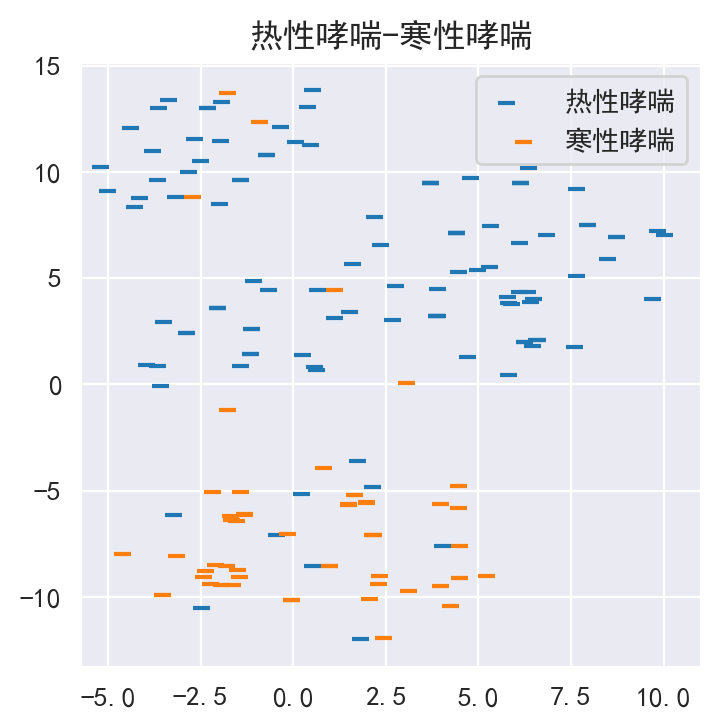

2022-09-13 19:38:03.473 | INFO     | __main__:<cell line: 92>:108 - 使用 SMOTETomek 混合采样
2022-09-13 19:38:03.480 | INFO     | __main__:<cell line: 113>:113 - 采样前：热性哮喘有113条,寒性哮喘有56条
2022-09-13 19:38:03.480 | INFO     | __main__:<cell line: 114>:114 - 采样后：热性哮喘有112条,寒性哮喘有112条
2022-09-13 19:38:08.694 | INFO     | __main__:<cell line: 146>:146 - {'max_depth': 10, 'grow_policy': 'depthwise', 'learning_rate': 0.0012565368271725847, 'gamma': 4.252260854533178e-06, 'reg_lambda': 0.026666955081893963, 'reg_alpha': 1.969617589231214e-08, 'subsample': 0.6836785198644488, 'colsample_bytree': 0.4573482400422041}
2022-09-13 19:38:08.810 | WARNING  | __main__:<cell line: 153>:153 - {'fit_time': array([0.03300047, 0.03299975, 0.03200006]), 'score_time': array([0.00399971, 0.00500059, 0.00399995]), 'test_accuracy': array([0.93333333, 0.86666667, 0.91891892]), 'test_precision': array([0.9      , 0.9375   , 0.8974359]), 'test_recall': array([0.97297297, 0.78947368, 0.94594595]), 'test_f1': array([0.93506494

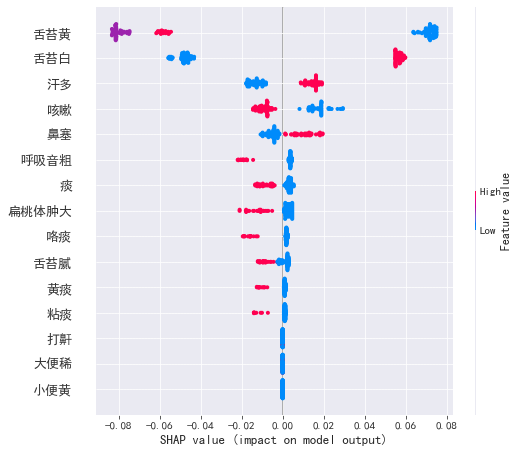

2022-09-13 19:38:09.136 | WARNING  | __main__:<cell line: 154>:167 - 0.867	0.938	0.789	0.857


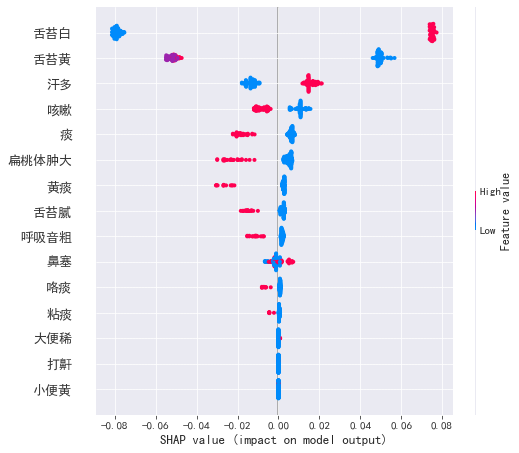

2022-09-13 19:38:09.394 | WARNING  | __main__:<cell line: 154>:167 - 0.919	0.897	0.946	0.921


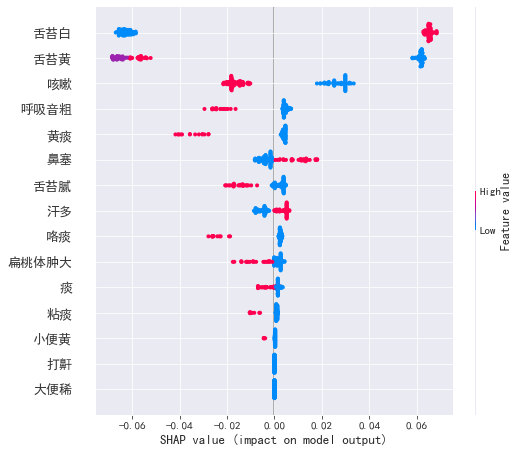

2022-09-13 19:38:09.629 | WARNING  | __main__:<cell line: 173>:173 - accuracy		mean:0.906	std:0.029
2022-09-13 19:38:09.631 | WARNING  | __main__:<cell line: 175>:175 - precision		mean:0.912	std:0.018
2022-09-13 19:38:09.632 | WARNING  | __main__:<cell line: 177>:177 - recall		mean:0.903	std:0.081
2022-09-13 19:38:09.634 | WARNING  | __main__:<cell line: 179>:179 - f1		mean:0.904	std:0.034


In [54]:
# 小儿哮喘 热性哮喘和寒性哮喘
from tkinter import CURRENT
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import chi2, SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from loguru import logger
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from utils import readJSON, preprocess
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from tqdm import tqdm
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import shap
from cmath import log
import collections
from collections import Counter
from datetime import datetime
from pprint import pprint
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
import warnings

warnings.filterwarnings('ignore')

optuna.logging.set_verbosity(optuna.logging.CRITICAL)
id2feature = {0: '热性哮喘', 1: '寒性哮喘'}
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决无法显示符号的问题
# sns.set(font='SimHei', font_scale=0.8)  # 解决Seaborn中文显示问题
data = pd.read_csv('./output/xiaoerxiaochuan/小儿哮喘_预处理.csv')
logger.add('./log/小儿哮喘{time}.log')
X = data.drop(columns='咳嗽分型')
y = data['咳嗽分型']
USE_chi2, USE_f_classif, USE_mutual_info_classif, USE_LSVC = False, False, False, True
if USE_chi2:
    logger.info('使用 卡方检验 进行特诊筛选')
    chi2_model = SelectKBest(chi2, k=80)
    X = pd.DataFrame(chi2_model.fit_transform(
        X, y), columns=chi2_model.get_feature_names_out())
elif USE_f_classif:
    logger.info('使用 F检验 进行特征筛选')
    f_classif_model = SelectKBest(f_classif, k=80)
    X = pd.DataFrame(f_classif_model.fit_transform(
        X, y), columns=f_classif_model.get_feature_names_out())
elif USE_mutual_info_classif:
    logger.info('使用 互信息法 进行特征筛选')
    mutual_info_classif_model = SelectKBest(mutual_info_classif, k=80)
    X = pd.DataFrame(mutual_info_classif_model.fit_transform(X, y),
                     columns=mutual_info_classif_model.get_feature_names_out())
elif USE_LSVC:
    from sklearn.svm import LinearSVC
    from sklearn.feature_selection import SelectFromModel

    scaler = StandardScaler()
    X_scale = scaler.fit_transform(X, y)
    X_scale = pd.DataFrame(X, columns=scaler.feature_names_in_)
    lsvc = LinearSVC(C=0.009, penalty='l2', dual=False,
                     random_state=64).fit(X_scale, y)
    model = SelectFromModel(lsvc, prefit=True)
    # X_new = model.transform(X_ce)
    col = [c for c, i in zip(X_scale.columns, model.get_support()) if not i]
    X.drop(columns=col, inplace=True)
    logger.info(f'使用 LASSO 进行特征选择,剩余{X.shape}个特征')
Accuracy = []
Precision = []
Recall = []
F1 = []

#TSNE
tsne = TSNE(n_components=2, init='pca', random_state=64)
X_tsne = tsne.fit_transform(X)
plt.figure(figsize=(4, 4), dpi=200)
for i in range(0, 2):
    plt.scatter(X_tsne[y == i][:, 0], X_tsne[y == i][:, 1],
                cmap=plt.cm.Set1(i), marker=i, label=str(id2feature[i]))
plt.legend()
plt.title('热性哮喘-寒性哮喘')
plt.show()

# 数据平衡
USE_randomDownSample, USE_Tomek_links, USE_ADASYN, USE_randomOverSample, USE_SMOTE, USE_SMOTETomek = False, False, False, False, False, True
if USE_randomDownSample:
    logger.info('使用 randomDownSample 下采样')
    sampler = RandomUnderSampler(random_state=64)
elif USE_Tomek_links:
    logger.info('使用 TomekLinks 下采样')
    sampler = TomekLinks()
elif USE_ADASYN:
    logger.info('使用 ADASYN 上采样')
    sampler = ADASYN(random_state=64)
elif USE_randomOverSample:
    logger.info('使用 randomOverSample 上采样')
    sampler = RandomOverSampler(random_state=64)
elif USE_SMOTE:
    logger.info('使用 SMOTE 上采样')
    sampler = SMOTE(random_state=64)
elif USE_SMOTETomek:
    logger.info('使用 SMOTETomek 混合采样')
    sampler = SMOTETomek(random_state=64)
else:
    assert False, '没有平衡数据'
X_resampled, y_resampled = sampler.fit_resample(X, y)
logger.info(f'采样前：{id2feature[0]}有{Counter(y)[0]}条,{id2feature[1]}有{Counter(y)[1]}条')
logger.info(f'采样后：{id2feature[0]}有{Counter(y_resampled)[0]}条,{id2feature[1]}有{Counter(y_resampled)[1]}条')


def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(
        X_resampled, y_resampled, test_size=0.1, random_state=64)
    param = {
        'verbosity': 0,
        'eval_metric': 'logloss',
        'objective': 'binary:logistic',
        # 'n_estimators':trial.suggest_int('n_estimators',3500,3600),
        'max_depth': trial.suggest_int("max_depth", 3, 12, step=1),
        'grow_policy': trial.suggest_categorical("grow_policy", ['depthwise', 'lossguide']),
        'learning_rate': trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        'tree_method': 'exact',
        # 'booster': 'dart',
        'gamma': trial.suggest_float("gamma", 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.2, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.2, 1.0),
        # 'eta': trial.suggest_float("eta", 1e-8, 1.0, log=True),
        'random_state': 42
    }
    model = xgb.XGBClassifier(**param).fit(train_x, train_y)
    preds = model.predict(valid_x)
    return accuracy_score(valid_y, preds)


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=600)
# logger.info(study.best_value)
logger.info(study.best_params)
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=64)
modelcv = xgb.XGBClassifier(**study.best_params)
# modelcv.save_model(f'./output/model/{datetime.now()}.json')

cv = cross_validate(modelcv, X_resampled, y_resampled, scoring=[
    'accuracy', 'precision', 'recall', 'f1'], cv=kf)
logger.warning(cv)
for train_index, test_index in kf.split(X_resampled, y_resampled):
    # print(Counter(y_resampled.loc[train_index]),Counter(y_resampled.loc[test_index]))
    model = xgb.XGBClassifier(**study.best_trial.params).fit(
        X_resampled.loc[train_index], y_resampled.loc[train_index])
    preds = model.predict(X_resampled.loc[test_index])
    accuracy = accuracy_score(y_resampled[test_index], preds)
    Accuracy.append(accuracy)
    precision = precision_score(y_resampled[test_index], preds)
    Precision.append(precision)
    recall = recall_score(y_resampled[test_index], preds)
    Recall.append(recall)
    f1 = f1_score(y_resampled[test_index], preds)
    F1.append(f1)
    logger.warning(f'{round(np.mean(accuracy), 3)}\t{round(np.mean(precision), 3)}\t'
                   f'{round(np.mean(recall), 3)}\t{round(np.mean(f1), 3)}')
    explainer = shap.TreeExplainer(model)
    shap_values_XGBoost_train = explainer.shap_values(
        X_resampled.loc[train_index])
    shap.summary_plot(shap_values_XGBoost_train, X_resampled.iloc[train_index])
logger.warning(
    f'accuracy\t\tmean:{round(np.mean(Accuracy), 3)}\tstd:{round(np.std(Accuracy), 3)}')
logger.warning(
    f'precision\t\tmean:{round(np.mean(Precision), 3)}\tstd:{round(np.std(Precision), 3)}')
logger.warning(
    f'recall\t\tmean:{round(np.mean(Recall), 3)}\tstd:{round(np.std(Recall), 3)}')
logger.warning(
    f'f1\t\tmean:{round(np.mean(F1), 3)}\tstd:{round(np.std(F1), 3)}')


- 心气虚：心、气虚（痰、血瘀）
- 心血虚证：心、血虚
- 心阴虚：心、阴虚（心神、痰、血瘀）
- 心阳虚：心、阳虚、（肾、寒、血瘀、气虚）
- 心血瘀阻：
- 心火亢盛：心、热、（血热、阴虚）
- 痰蒙心神证：心神、痰、闭、（经络、湿、气滞）
- 瘀阻脑络：心神、血瘀（经络、气滞、闭、动风）


In [109]:
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import chi2, SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from loguru import logger
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from utils import readJSON, preprocess
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from tqdm import tqdm
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import shap
from cmath import log
import collections
from collections import Counter
from datetime import datetime
from pprint import pprint
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
import warnings

warnings.filterwarnings('ignore')

optuna.logging.set_verbosity(optuna.logging.CRITICAL)
id2feature = {0: '热性哮喘', 1: '寒性哮喘'}
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决无法显示符号的问题
# sns.set(font='SimHei', font_scale=0.8)  # 解决Seaborn中文显示问题
X, y = preprocess(path='./input/心总表.xlsx', sheet_name='总表')
logger.add('./log/小儿哮喘{time}.log')
data = pd.concat([pd.DataFrame(X), pd.DataFrame(y, columns=['证名'])], axis=1)
for index, row in data.iterrows():
    if row['证名'] == 3:
        data.loc[index, '心'] = 1
        data.loc[index, '阴虚'] = 1
        data.loc[index, '心神'] = 1
        data.loc[index, '痰'] = 1
        data.loc[index, '血瘀'] = 1
    if row['证名'] == 4:
        data.loc[index, '心'] = 1
        data.loc[index, '阳虚'] = 1
        data.loc[index, '肾'] = 1
        data.loc[index, '寒'] = 1
        data.loc[index, '血瘀'] = 1
        data.loc[index, '气虚'] = 1
data.fillna(0, inplace=True)
yinxu = data[(data['证名'] == 3)]
yangxu = data[(data['证名'] == 4)]
tmp = pd.concat([yinxu, yangxu], axis=0).sample(frac=1).reset_index(drop=True)
X = tmp.loc[:, 'S1':'S125']
y = tmp.loc[:, '心':'痰']
tmp.to_csv('./output/xinbing-zhengsu.csv', index=False)
pd.read_csv('./output/xinbing-zhengsu.csv')

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,证名,心,阳虚,肾,寒,血瘀,气虚,阴虚,心神,痰
0,0,0,0,0,0,0,0,0,0,0,...,3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
1,0,0,0,0,0,0,0,0,0,0,...,3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2,0,0,0,0,0,0,0,0,0,0,...,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
4,0,0,0,0,0,0,0,0,1,0,...,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,0,0,0,0,0,0,0,0,0,0,...,3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
301,0,0,0,0,0,0,0,0,0,0,...,3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
302,0,0,0,0,0,0,0,0,0,0,...,3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
303,0,0,0,0,0,0,0,0,0,0,...,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [7]:
from sklearn.model_selection import cross_validate
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_selection import chi2, SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from loguru import logger
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from utils import readJSON, preprocess
import optuna
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from tqdm import tqdm
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import shap
from cmath import log
import collections
from collections import Counter
from datetime import datetime
from pprint import pprint
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
import warnings
from sklearn.metrics import zero_one_loss,hamming_loss
warnings.filterwarnings('ignore')

optuna.logging.set_verbosity(optuna.logging.CRITICAL)
id2feature = {0: '热性哮喘', 1: '寒性哮喘'}
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决无法显示符号的问题
# sns.set(font='SimHei', font_scale=0.8)  # 解决Seaborn中文显示问题
data = pd.read_csv('./output/xinbing-zhengsu.csv')
logger.add('./log/小儿哮喘{time}.log')
USE_chi2, USE_f_classif, USE_mutual_info_classif, USE_LSVC = False, False, False, False
if USE_chi2:
    logger.info('使用 卡方检验 进行特诊筛选')
    chi2_model = SelectKBest(chi2, k=80)
    X = pd.DataFrame(chi2_model.fit_transform(
        X, y), columns=chi2_model.get_feature_names_out())
elif USE_f_classif:
    logger.info('使用 F检验 进行特征筛选')
    f_classif_model = SelectKBest(f_classif, k=80)
    X = pd.DataFrame(f_classif_model.fit_transform(
        X, y), columns=f_classif_model.get_feature_names_out())
elif USE_mutual_info_classif:
    logger.info('使用 互信息法 进行特征筛选')
    mutual_info_classif_model = SelectKBest(mutual_info_classif, k=80)
    X = pd.DataFrame(mutual_info_classif_model.fit_transform(X, y),
                     columns=mutual_info_classif_model.get_feature_names_out())
elif USE_LSVC:
    from sklearn.svm import LinearSVC
    from sklearn.feature_selection import SelectFromModel

    scaler = StandardScaler()
    X_scale = scaler.fit_transform(X, y)
    X_scale = pd.DataFrame(X, columns=scaler.feature_names_in_)
    lsvc = LinearSVC(C=0.009, penalty='l2', dual=False,
                     random_state=64).fit(X_scale, y)
    model = SelectFromModel(lsvc, prefit=True)
    # X_new = model.transform(X_ce)
    col = [c for c, i in zip(X_scale.columns, model.get_support()) if not i]
    X.drop(columns=col, inplace=True)
    logger.info(f'使用 LASSO 进行特征选择,剩余{X.shape}个特征')
Accuracy = []
Precision = []
Recall = []
F1 = []
ZERO_ONE = []
HAMMING = []

X = data.loc[:,'S1':'S125']
y = data.loc[:,'心':'痰']
#TSNE
# tsne = TSNE(n_components=2, init='pca', random_state=64)
# X_tsne = tsne.fit_transform(X)
# plt.figure(figsize=(4, 4), dpi=200)
# for i in range(0, 2):
#     plt.scatter(X_tsne[y == i][:, 0], X_tsne[y == i][:, 1],
#                 cmap=plt.cm.Set1(i), marker=i, label=str(id2feature[i]))
# plt.legend()
# plt.title('热性哮喘-寒性哮喘')
# plt.show()

# 数据平衡
# USE_randomDownSample, USE_Tomek_links, USE_ADASYN, USE_randomOverSample, USE_SMOTE, USE_SMOTETomek = False, False, False, False, False, True
# if USE_randomDownSample:
#     logger.info('使用 randomDownSample 下采样')
#     sampler = RandomUnderSampler(random_state=64)
# elif USE_Tomek_links:
#     logger.info('使用 TomekLinks 下采样')
#     sampler = TomekLinks()
# elif USE_ADASYN:
#     logger.info('使用 ADASYN 上采样')
#     sampler = ADASYN(random_state=64)
# elif USE_randomOverSample:
#     logger.info('使用 randomOverSample 上采样')
#     sampler = RandomOverSampler(random_state=64)
# elif USE_SMOTE:
#     logger.info('使用 SMOTE 上采样')
#     sampler = SMOTE(random_state=64)
# elif USE_SMOTETomek:
#     logger.info('使用 SMOTETomek 混合采样')
#     sampler = SMOTETomek(random_state=64)
# else:
#     assert False, '没有平衡数据'
# X_resampled, y_resampled = sampler.fit_resample(X, y)
# logger.info(f'采样前：{id2feature[0]}有{Counter(y)[0]}条,{id2feature[1]}有{Counter(y)[1]}条')
# logger.info(f'采样后：{id2feature[0]}有{Counter(y_resampled)[0]}条,{id2feature[1]}有{Counter(y_resampled)[1]}条')


def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(
        X, y, test_size=0.1, random_state=64)
    param = {
        'verbosity': 0,
        'eval_metric': 'logloss',
        'objective': 'binary:logistic',
        # 'n_estimators':trial.suggest_int('n_estimators',3500,3600),
        'max_depth': trial.suggest_int("max_depth", 3, 12, step=1),
        'grow_policy': trial.suggest_categorical("grow_policy", ['depthwise', 'lossguide']),
        'learning_rate': trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        'tree_method': 'exact',
        # 'booster': 'dart',
        'gamma': trial.suggest_float("gamma", 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.2, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.2, 1.0),
        # 'eta': trial.suggest_float("eta", 1e-8, 1.0, log=True),
        'random_state': 42
    }
    model = MultiOutputClassifier(XGBClassifier(**param)).fit(train_x, train_y)
    preds = model.predict(valid_x)
    return accuracy_score(valid_y, preds)


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=600)
logger.info(study.best_value)
logger.info(study.best_params)
kf = KFold(n_splits=5, shuffle=True, random_state=64)
params = {'estimator__max_depth': study.best_params['max_depth'],
          'estimator__grow_policy': study.best_params['grow_policy'],
          'estimator__learning_rate': study.best_params['learning_rate'],
          'estimator__gamma': study.best_params['learning_rate'],
          'estimator__reg_lambda': study.best_params['reg_lambda'],
          'estimator__reg_alpha': study.best_params['reg_alpha'],
          'estimator__subsample': study.best_params['subsample'],
          'estimator__colsample_bytree': study.best_params['colsample_bytree']
          }

for train_index, test_index in kf.split(X, y):
    model = MultiOutputClassifier(estimator=XGBClassifier()).set_params(**params).fit(
        X.loc[train_index], y.loc[train_index])
    preds = model.predict(X.loc[test_index])
    accuracy = accuracy_score(y.loc[test_index], preds)
    Accuracy.append(accuracy)
    zero_one = zero_one_loss(y.loc[test_index],preds)
    ZERO_ONE.append(zero_one)
    hamming = hamming_loss(y.loc[test_index],preds)
    HAMMING.append(hamming)
    precision = precision_score(y.loc[test_index], preds, average='micro')
    Precision.append(precision)
    recall = recall_score(y.loc[test_index], preds, average='macro')
    Recall.append(recall)
    f1 = f1_score(y.loc[test_index], preds, average='macro')
    F1.append(f1)
    logger.warning(f'{round(np.mean(accuracy), 3)}\t{round(np.mean(precision), 3)}\t'
                   f'{round(np.mean(recall), 3)}\t{round(np.mean(f1), 3)}\t'
                   f'{round(np.mean(zero_one), 3)}\t{round(np.mean(hamming), 3)}')
logger.warning(
    f'accuracy\t\tmean:{round(np.mean(Accuracy), 3)}\tstd:{round(np.std(Accuracy), 3)}')
logger.warning(
    f'precision\t\tmean:{round(np.mean(Precision), 3)}\tstd:{round(np.std(Precision), 3)}')
logger.warning(
    f'recall\t\tmean:{round(np.mean(Recall), 3)}\tstd:{round(np.std(Recall), 3)}')
logger.warning(
    f'f1\t\tmean:{round(np.mean(F1), 3)}\tstd:{round(np.std(F1), 3)}')
logger.warning(
    f'zero_one\t\tmean:{round(np.mean(ZERO_ONE), 3)}\tstd:{round(np.std(ZERO_ONE), 3)}')
logger.warning(
    f'hamming_loss\t\tmean:{round(np.mean(HAMMING), 3)}\tstd:{round(np.std(HAMMING), 3)}')
# for i in range(10):
#     train_x, valid_x, train_y, valid_y = train_test_split(
#         X, y, test_size=0.1, random_state=i)
#     model = MultiOutputClassifier(estimator=XGBClassifier()).set_params(**params).fit(
#         train_x, train_y)
#     preds = model.predict(valid_x)
#     accuracy = accuracy_score(valid_y, preds)
#     Accuracy.append(accuracy)
#     zero_one = zero_one_loss(valid_y,preds)
#     ZERO_ONE.append(zero_one)
#     hamming = hamming_loss(valid_y,preds)
#     HAMMING.append(hamming)
#     precision = precision_score(valid_y, preds, average='micro')
#     Precision.append(precision)
#     recall = recall_score(valid_y, preds, average='micro')
#     Recall.append(recall)
#     f1 = f1_score(valid_y, preds, average='micro')
#     F1.append(f1)
#     logger.warning(f'{round(np.mean(accuracy), 3)}\t{round(np.mean(precision), 3)}\t'
#                    f'{round(np.mean(recall), 3)}\t{round(np.mean(f1), 3)}\t'
#                    f'{round(np.mean(zero_one), 3)}\t{round(np.mean(hamming), 3)}')
# logger.warning(
#     f'accuracy\t\tmean:{round(np.mean(Accuracy), 3)}\tstd:{round(np.std(Accuracy), 3)}')
# logger.warning(
#     f'precision\t\tmean:{round(np.mean(Precision), 3)}\tstd:{round(np.std(Precision), 3)}')
# logger.warning(
#     f'recall\t\tmean:{round(np.mean(Recall), 3)}\tstd:{round(np.std(Recall), 3)}')
# logger.warning(
#     f'f1\t\tmean:{round(np.mean(F1), 3)}\tstd:{round(np.std(F1), 3)}')
# logger.warning(
#     f'zero_one\t\tmean:{round(np.mean(ZERO_ONE), 3)}\tstd:{round(np.std(ZERO_ONE), 3)}')
# logger.warning(
#     f'hamming_loss\t\tmean:{round(np.mean(HAMMING), 3)}\tstd:{round(np.std(HAMMING), 3)}')

2022-10-09 14:51:01.886 | INFO     | __main__:<cell line: 147>:147 - 0.8064516129032258
2022-10-09 14:51:01.886 | INFO     | __main__:<cell line: 148>:148 - {'max_depth': 12, 'grow_policy': 'lossguide', 'learning_rate': 5.409249234929033e-07, 'gamma': 1.4425266357687808e-06, 'reg_lambda': 1.0470047367782761e-07, 'reg_alpha': 1.4479831071453043e-08, 'subsample': 0.4196363994940181, 'colsample_bytree': 0.22198734780504337}
2022-10-09 14:51:02.430 | WARNING  | __main__:<cell line: 160>:176 - 0.672	0.786	0.661	0.663	0.328	0.255
2022-10-09 14:51:02.905 | WARNING  | __main__:<cell line: 160>:176 - 0.508	0.833	0.57	0.472	0.492	0.383
2022-10-09 14:51:03.381 | WARNING  | __main__:<cell line: 160>:176 - 0.574	0.679	0.585	0.543	0.426	0.332
2022-10-09 14:51:03.887 | WARNING  | __main__:<cell line: 160>:176 - 0.705	0.756	0.658	0.668	0.295	0.23
2022-10-09 14:51:04.393 | WARNING  | __main__:<cell line: 160>:176 - 0.754	0.758	0.664	0.682	0.246	0.191
2022-10-09 14:51:04.393 | WARNING  | __main__:<cell 